In [1]:
import numpy as np
from sklearn.cluster import SpectralClustering
import sklearn
import networkx
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ca-AstroPh.txt', delimiter='	')
df

,Source,Target
0,84424,276
1,84424,1662
2,84424,5089
3,84424,6058
4,84424,6229
...,...,...
396155,49676,50641
396156,49676,57507
396157,50641,26325
396158,50641,49676


In [39]:
G = networkx.from_pandas_edgelist(df[: 1000], source='Source', target='Target')

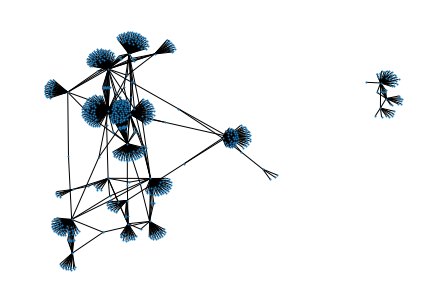

In [40]:
networkx.draw_spring(G, with_labels=False, node_size=1)

In [50]:
adj_mat = np.asarray(networkx.to_numpy_matrix(G))
adj_mat


array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
sc = SpectralClustering(25, affinity='precomputed', n_init=100)
f = sc.fit(adj_mat)


/home/risak/.local/share/virtualenvs/igl-YJ1U9y2j/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [61]:
labels = f.labels_
labels

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  9,  1,  1,  1,  1,  9,
        1,  1,  9,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  9,  1,  6,  1,  1,  1,  1,  9,  1,  1,  5,  1, 24,  1,  1,  1,
       13,  6,  1,  1,  1,  1,  6,  1,  1,  1,  1,  1,  9,  1,  9,  1,  1,
        6,  1,  1,  1,  1,  1,  1,  1, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 24, 13,  5, 13, 13, 13, 13,  9, 13, 13,  4, 13, 13, 13, 13, 13,
       13, 13, 13,  6,  6,  6,  6, 18,  6,  6,  6,  6,  6,  6,  6, 23,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  9,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6, 18,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  4,  6,  6,  6,  6,  6,  6,  6, 18,  6,  6, 19,  6,
        6,  6,  6,  6,  6,  6,  6, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
        9, 17, 17, 17, 17, 17, 17, 17, 17, 22, 17, 17, 17,  9, 17, 17, 17,
       21, 21, 19, 21, 21, 21,  9, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21